<a href="https://colab.research.google.com/github/shiissaa/MAT422/blob/main/1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.2.1 Linear Spaces**

Linear combination - a new vector constructed from a subset by multiplying each vector by a constant and adding the results. A linear subspace is a result of these combinations. A span is a set of linear subspaces.

In [5]:
# In this example, each vector is multiplied by a constant, resulting in x, a linear combinatoin
a_1 = -2
a_2 = 3
a_3 = 4
u_1 = 1
u_2 = -2
u_3 = 2
x = a_1*u_1 + a_2*u_2 + a_3*u_3
print(x)

0


Linear independence occurs when none of the vectors in a list can be written as a linear combination of the others. We can use python to calculate the determinant, and if it is not 0, then it is linearly independent.

In [10]:
import numpy as np
def lin_ind(v1, v2):
  matrix = np.stack((v1, v2), axis = -1)
  determinant = np.linalg.det(matrix)
  if (determinant == 0):
    print("Independent: No")
  else:
    print("Independent: Yes")
v1 = np.array([1,2])
v2 = np.array([4,8])
v3 = np.array([6,4])
lin_ind(v1, v2)
lin_ind(v2, v3)
lin_ind(v1, v3)

Independent: No
Independent: Yes
Independent: Yes


**1.2.2 Orthogonality**

Orthogonality and its bases can be very helpful in simplifying mathematical representations and reveal more insights. A basis is said to be orthonormal if the vectors are pairwise orthogonal and each has a norm of 1. An example of this is the identity matrix.

**1.2.3 Gran-Schmidt Process**

This is an algorithm used to obtain an orthonormal basis.

In [18]:
# From https://github.com/ZachDischner/gramSchmidt/blob/6be5241b7199790591f61172096594a68870859b/gramSchmidt.py
def proj(x,u):
    ## Can't hurt
    u = unit_vec(u)
    return np.dot(x,u) * u

def unit_vec(x):
    """Get unit vector of x. Same direction, norm==1"""
    return x/np.linalg.norm(x)

def gramSchmidt(vectors):
    """Return orthonormalized vectors for the vector space `vectors` provided

    Recursive algorithm that orthonormalizes smaller and smaller chunks of the vector space provided

    Args:
        vectors:    (list of lists or array) vector space to orthonormalize

    Example:
        From Wikipedia example

        >>> gramSchmidt([[3,1],[2,2]])
        array([[ 0.9486833 ,  0.31622777],
               [-0.31622777,  0.9486833 ]])
        == 1/sqrt(10) * np.array([[3,1],[-1,3]])
    """

    ###### Ensure the input is a 2d array (or can be treated like one)
    vectors = np.atleast_2d(vectors)

    ###### Handle recursion end conditions
    if len(vectors) == 0:
        return []

    if len(vectors) == 1:
        return unit_vec(vectors)

    u = vectors[-1]

    ###### Orthonormalize the rest of the vector space
    basis = gramSchmidt(vectors[0:-1])

    ## Append this vector orthonormalized to the rest to the basis
    w = np.atleast_2d(u - np.sum( proj(u,v)  for v in basis))
    basis = np.append(basis,unit_vec(w),axis=0)

    return basis

def modifiedGramSchmidt(vectors):
    """ _correct_ recursive implementation of Gram Schmidt algo that is not subject to
    rounding erros that the original formulation is.

    Function signature and usage is the same as gramSchmidt()
    """
    ###### Ensure the input is a 2d array (or can be treated like one)
    vectors = np.atleast_2d(vectors)

    ###### Handle End Conditions
    if len(vectors) == 0:
        return []

    ## Always just take unit vector of first vector for the start of the basis
    u1 = unit_vec(vectors[0])

    if len(vectors) == 1:
        return u1

    ###### Orthonormalize the rest of the vectors
    #           | easy row stacking
    #           |                                            | Get the orthagonal projection of each subsequent vector onto u1 (ensures whole space is now orthagonal to u1)
    #                       | Recurse on the projections     |
    basis = np.vstack( (u1, modifiedGramSchmidt( list(map(lambda v: v - proj(v,u1), vectors[1:])))) ) # not explicit list(map) conversion, need for python3+

    return np.array(basis)

def _is_orthag(vectors):
    """Simple check, sees if all of the vectors in v are orthagonal to eachother.

    Takes the dot product of each vector pair, sees if the result is close to zero
    """
    orthag = True
    vectors = np.atleast_2d(vectors)
    for vector in vectors:
        for vector2 in vectors:
            ## Don't dot itself
            if np.array_equal(vector,vector2):
                continue
            ## Dot product alwys has some numerical precision remainder
            if abs(np.dot(vector,vector2)) > 1e-5:
                orthag = False
    return orthag


def test():
    vectors = [[3,1],[2,2]]
    print("Test 1: Finding orthonormal basis for simple vector space {}".format(vectors))
    ## Example vectors from https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process
    ospace = gramSchmidt(vectors)
    ospace2 = modifiedGramSchmidt(vectors)
    ## Are the two about the same?
    samesies = np.array_equal(ospace,ospace2)
    print("\nFor vector space provided {}\n\tOrthonormalized basis produced with classical Gram Schmidt process \n{}".format(vectors,ospace))
    print("\n\tOrthonormal basis produced with Modified Gram Schmidt process: \n{}, \nAre the two about equal?? {}".format(ospace2,samesies))
    print("\tAre all basis vectors orthagonal to eachother? {}".format(_is_orthag(ospace)))


    vectors = [[3,13,2,5],[1,1,2,2],[8,-1,-0.5,0],[1,-9,0,0]]
    print("\n\nTest 2: Finding orthonormal basis for arbritrary and more complex vector space {}".format(vectors))
    ospace = modifiedGramSchmidt(vectors)
    ## Are the two about the same?
    print("\tFor vector space provided \n{}\nOrthonormalized basis produced with modified Gram Schmidt process \n{}".format(vectors,ospace))
    print("\tAre all basis vectors orthagonal to eachother? {}".format(_is_orthag(ospace)))

test()

Test 1: Finding orthonormal basis for simple vector space [[3, 1], [2, 2]]

For vector space provided [[3, 1], [2, 2]]
	Orthonormalized basis produced with classical Gram Schmidt process 
[[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]]

	Orthonormal basis produced with Modified Gram Schmidt process: 
[[ 0.9486833   0.31622777]
 [-0.31622777  0.9486833 ]], 
Are the two about equal?? True
	Are all basis vectors orthagonal to eachother? True


Test 2: Finding orthonormal basis for arbritrary and more complex vector space [[3, 13, 2, 5], [1, 1, 2, 2], [8, -1, -0.5, 0], [1, -9, 0, 0]]
	For vector space provided 
[[3, 13, 2, 5], [1, 1, 2, 2], [8, -1, -0.5, 0], [1, -9, 0, 0]]
Orthonormalized basis produced with modified Gram Schmidt process 
[[ 0.20851441  0.90356246  0.13900961  0.34752402]
 [ 0.23774301 -0.37185445  0.71932501  0.53644577]
 [ 0.94667407 -0.11721351 -0.25246829 -0.16226199]
 [-0.0617106  -0.17765173 -0.63206616  0.75174732]]
	Are all basis vectors orthagonal to eachot

<ipython-input-18-55ad9ab0a58c>:44: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  w = np.atleast_2d(u - np.sum( proj(u,v)  for v in basis))


**1.2.4 Eigenvalues and Eigenvectors**

An eigenvector (or characteristic vector) is a nonzero vector that changes at most by a constant factor when that linear transformation is applied to it. The corresponding eigenvalue is the multiplying factor. The below shows a graph with two vectors, one of which is a transformation of the other after having an eigenvalue applied to it.

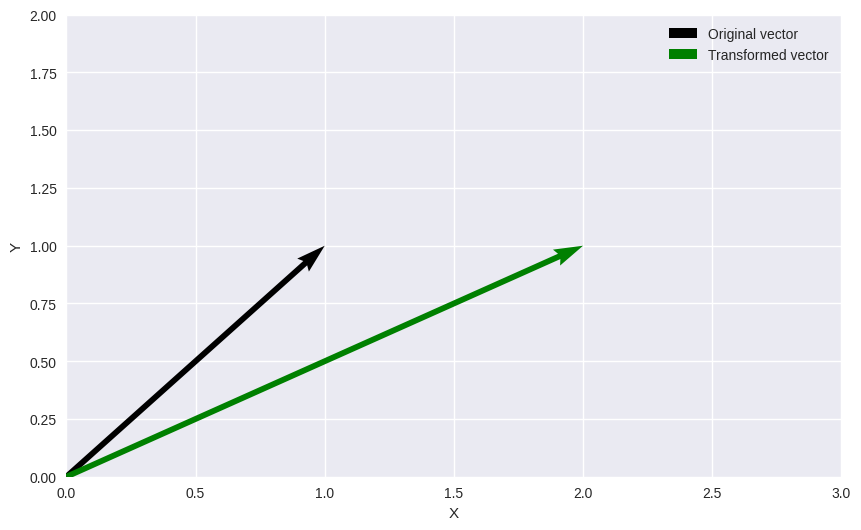

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors,
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
A = np.array([[2, 0],[0, 1]])
x = np.array([[1],[1]])
b = np.dot(A, x)
plot_vect(x,b,(0,3),(0,2))

Characteristic equation -

From $Ax=λx$ we can get $(A-λI)x=0$.

$I$ is the identity matrix with the same dimensions as $A$. If matrix $A-λI$ has an inverse, then multiply both sides with the inverse, giving us a trivial solution $x=0$. Therefore, when $A-λI$ is singular (no existing inverse), we get a nontrivial solution, which means the determinant is zero:

$det(A-λI)=0$

This "characteristic equation" will lead to a polynomial equation for λ, which can then lead to solving for eigenvalues.

